In [161]:
# Bibliotecas
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn.preprocessing import scale, minmax_scale, power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [162]:
# Base de dados
url = "https://drive.google.com/uc?id=1Hn4Jf2d3R0QWP2830Lgu7dYixoy8sQ6n"
output = "your_file_name.csv"  # specify the desired output file name

gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1Hn4Jf2d3R0QWP2830Lgu7dYixoy8sQ6n
To: c:\Users\alexa\OneDrive\Área de Trabalho\desafio_4\your_file_name.csv
100%|██████████| 4.19k/4.19k [00:00<00:00, 4.14MB/s]


In [163]:
# Análise para verificar as colunas do dataset
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [164]:
# Análise para verificar se tem elementos nulos e quais os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [165]:
# Verificando os quartis, desvio padrão, máximo e minímo
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [166]:
# Análise da correlação entre as colunas
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


In [167]:
# Verificando se tem dados duplicados
df[df.duplicated(keep=False)]

,youtube,facebook,newspaper,sales


In [168]:
# Identificando quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(5)
)

,,,,n_duplicates
youtube,facebook,newspaper,sales,


In [169]:
# Identificar e mostrar valores nulos para possíveis trativas
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
youtube,0,0.00%
facebook,0,0.00%
newspaper,0,0.00%
sales,0,0.00%


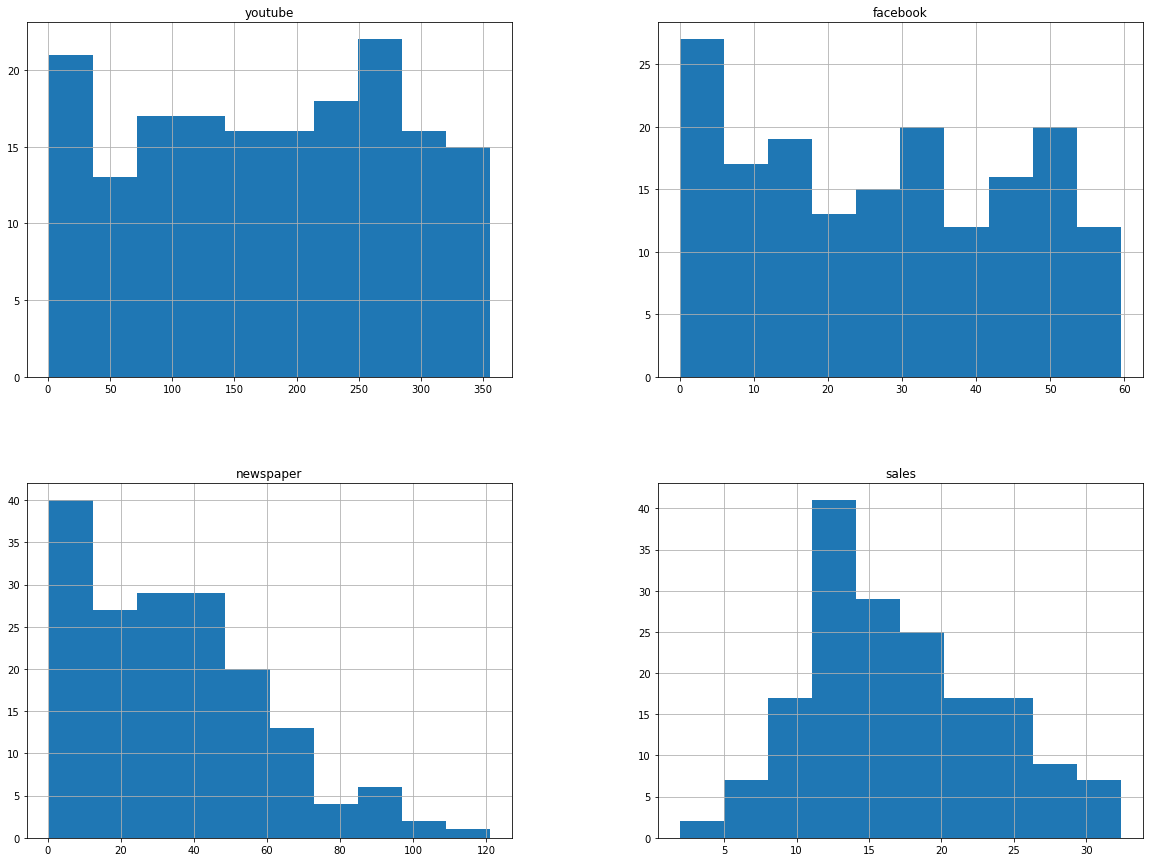

In [170]:
# Análise das distruições dos dados via histograma
df.hist(bins=10, figsize=(20,15))
plt.show()

In [171]:
# Função para verificar outlier
def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array<-3) | (scaled_array>3)

df_without_outliers = df[~df.apply(zscore_outlier).any(axis=1)]

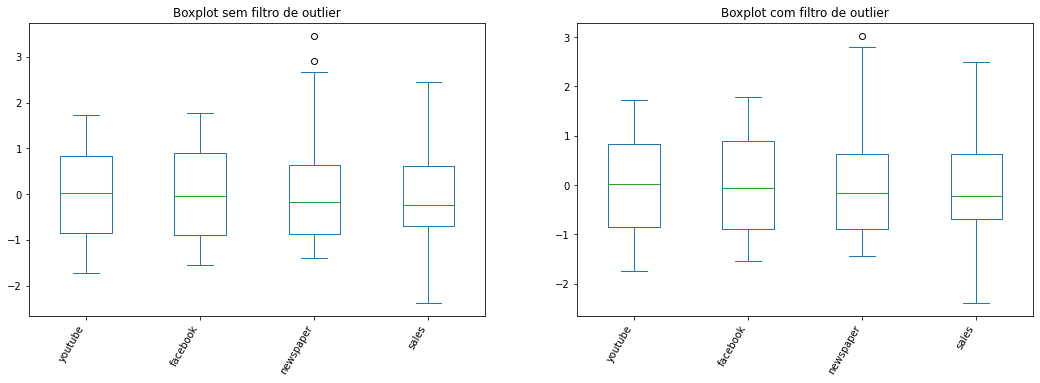

In [172]:
# Figura lado a lado dos dados originais e padronizados destacando 3 desvio padrão

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

In [173]:
# Dividindo a base em target e colunas a serem treinadas
y = df.drop(columns=['youtube', 'facebook', 'newspaper'])
X = df.drop(columns=['sales'])

In [174]:
# Definindo a forma que as bases serão treinadas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# treinando as bases usando regressão linear
regLinear = LinearRegression().fit(X_train, y_train)

In [176]:
# predizendo os valores
yPredLinear = regLinear.predict(X_test)

In [177]:
# Análise do r2 e mse
MSE = mean_squared_error(y_test, yPredLinear)
r2 = r2_score(y_test, yPredLinear)

In [178]:
# Verificando a qualidade do modelo
print("r2: ", r2)
print("MSE: ", MSE)
print("RMSE: ",np.sqrt(MSE))

r2:  0.872863085701216
MSE:  5.576790234026714
RMSE:  2.361522863329236
